In [1]:
#Modelo AutoML para pronosticar la inflación subyacente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
plt.rc('font', family='Times New Roman')

In [2]:
#Creamos el dataframe

dataset = pd.read_excel('IPC_series.xlsx',sheet_name='IPCSUB', parse_dates=['fecha'])
descripcion1=pd.DataFrame(dataset.describe())
descripcion1
train_data = dataset.iloc[0:396, 0:12]
test_data = dataset.iloc[396:411 ,0:12]


In [10]:
dataset

,fecha,item_id,ipcsub,inp,m1,sn,sr,pml,e,cetes28,cetes91,cetesdif
0,1989-01-31,ipcsub,6.900670,NaN,1.914647e+07,NaN,NaN,NaN,2.3100,50.7800,50.6575,42.0975
1,1989-02-28,ipcsub,7.039663,NaN,1.929388e+07,NaN,NaN,NaN,2.3380,49.1525,49.3950,40.5550
2,1989-03-31,ipcsub,7.136210,NaN,1.942008e+07,NaN,NaN,NaN,2.3690,47.7860,48.8080,39.6680
3,1989-04-30,ipcsub,7.222918,NaN,1.979879e+07,NaN,NaN,NaN,2.3970,50.0875,51.5475,42.5875
4,1989-05-31,ipcsub,7.298140,NaN,2.033392e+07,NaN,NaN,NaN,2.4300,51.8325,53.8275,45.0875
...,...,...,...,...,...,...,...,...,...,...,...,...
406,2022-11-30,ipcsub,124.574021,-0.240753,6.602503e+09,160.4984,104.5,100.9154,19.3250,9.4150,10.1725,5.8525
407,2022-12-31,ipcsub,125.378874,0.004631,6.926065e+09,212.2967,137.7,97.0634,19.4143,9.9560,10.5340,6.1740
408,2023-01-31,ipcsub,126.275085,0.417539,6.670315e+09,163.7563,105.5,101.1821,18.7872,10.6125,10.8825,6.1925
409,2023-02-28,ipcsub,127.046512,-0.034532,6.639891e+09,164.8254,105.6,97.5423,18.4023,10.9225,11.2875,6.4975


In [3]:
train_data = TimeSeriesDataFrame.from_data_frame(
    train_data,
    id_column="item_id",
    timestamp_column="fecha"
)
train_data.head()

ipcsub  inp          m1  sn  sr  pml      e  cetes28  \
item_id timestamp                                                            
ipcsub  1989-01-31  6.900670  NaN  19146466.0 NaN NaN  NaN  2.310  50.7800   
        1989-02-28  7.039663  NaN  19293875.0 NaN NaN  NaN  2.338  49.1525   
        1989-03-31  7.136210  NaN  19420077.0 NaN NaN  NaN  2.369  47.7860   
        1989-04-30  7.222918  NaN  19798791.0 NaN NaN  NaN  2.397  50.0875   
        1989-05-31  7.298140  NaN  20333925.0 NaN NaN  NaN  2.430  51.8325   

                    cetes91  cetesdif  
item_id timestamp                      
ipcsub  1989-01-31  50.6575   42.0975  
        1989-02-28  49.3950   40.5550  
        1989-03-31  48.8080   39.6680  
        1989-04-30  51.5475   42.5875  
        1989-05-31  53.8275   45.0875

In [4]:
#En caso de valores en blanco en las series
train_data = train_data.fill_missing_values()
train_data

ipcsub       inp            m1        sn     sr  \
item_id timestamp                                                         
ipcsub  1989-01-31    6.900670  0.652000  1.914647e+07   77.0318   96.7   
        1989-02-28    7.039663  0.652000  1.929388e+07   77.0318   96.7   
        1989-03-31    7.136210  0.652000  1.942008e+07   77.0318   96.7   
        1989-04-30    7.222918  0.652000  1.979879e+07   77.0318   96.7   
        1989-05-31    7.298140  0.652000  2.033392e+07   77.0318   96.7   
...                        ...       ...           ...       ...    ...   
        2021-08-31  113.296654  0.320738  5.854176e+09  143.9769  103.7   
        2021-09-30  113.815393  0.367977  5.880840e+09  146.4010  104.8   
        2021-10-31  114.377964  1.223382  5.936066e+09  147.9091  105.0   
        2021-11-30  114.799064  1.056783  6.105346e+09  146.1829  102.6   
        2021-12-31  115.720705  0.619087  6.377134e+09  194.1877  135.8   

                        pml        e  cetes28  cetes91  cetesdif  
item_id timestamp                                                 
ipcsub  1989-01-31  94.5598   2.3100  50.7800  50.6575   42.0975  
        1989-02-28  94.5598   2.3380  49.1525  49.3950   40.5550  
        1989-03-31  94.5598   2.3690  47.7860  48.8080   39.6680  
        1989-04-30  94.5598   2.3970  50.0875  51.5475   42.5875  
        1989-05-31  94.5598   2.4300  51.8325  53.8275   45.0875  
...                     ...      ...      ...      ...       ...  
        2021-08-31  98.1646  20.2293   4.4550   4.8400    4.7900  
        2021-09-30  93.8768  20.3060   4.5500   4.8840    4.8440  
        2021-10-31  98.7500  20.1930   4.8400   5.2750    5.2250  
        2021-11-30  97.9952  21.8185   5.0475   5.4625    5.4125  
        2021-12-31  96.0645  20.5835   5.2880   5.6360    5.5760  

[396 rows x 10 columns]

In [27]:
train_data.tail()

ipcsub       inp            m1        sn     sr  \
item_id timestamp                                                         
ipcsub  2021-08-31  113.296654  0.320738  5.854176e+09  143.9769  103.7   
        2021-09-30  113.815393  0.367977  5.880840e+09  146.4010  104.8   
        2021-10-31  114.377964  1.223382  5.936066e+09  147.9091  105.0   
        2021-11-30  114.799064  1.056783  6.105346e+09  146.1829  102.6   
        2021-12-31  115.720705  0.619087  6.377134e+09  194.1877  135.8   

                        pml        e  cetes28  cetes91  cetesdif  
item_id timestamp                                                 
ipcsub  2021-08-31  98.1646  20.2293   4.4550   4.8400    4.7900  
        2021-09-30  93.8768  20.3060   4.5500   4.8840    4.8440  
        2021-10-31  98.7500  20.1930   4.8400   5.2750    5.2250  
        2021-11-30  97.9952  21.8185   5.0475   5.4625    5.4125  
        2021-12-31  96.0645  20.5835   5.2880   5.6360    5.5760

In [5]:
#Establecemos la variable objetivo
target = 'ipcsub'
#Ruta para guardar el modelo
save_path = 'series_ipc_sub_bestfinal'  # specifies folder to store trained models

In [9]:
#Entrenamos al modelo
predictor = TimeSeriesPredictor(
    prediction_length=12,
    path=save_path,
    target=target,
    eval_metric="MSE",
)

predictor.fit(
    train_data,
    presets="best_quality",
    time_limit=10000000,
)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: best_quality
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'MSE',
 'hyperparameter_tune_kwargs': {'num_trials': 10,
                                'scheduler': 'local',
                                'searcher': 'auto'},
 'hyperparameters': 'best_quality',
 'prediction_length': 12,
 'random_seed': None,
 'target': 'ipcsub',
 'time_limit': 10000000}
Provided training data set with 396 rows, 1 items (item = single time series). Average time series length is 396.0.
Training artifacts will be saved to: C:\Users\Erik Rosas\DB tesina\series_ipc_sub_bestfinal
AutoGluon will save models to series_ipc_sub_bestfinal\
AutoGluon will gauge predictive performance using evaluation metric: 'MSE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.

Provided dataset contains foll

  0%|          | 0/10 [00:00<?, ?it/s]

Stopping HPO due to exhausted search space: 2 of 2 possible configs ran.
	Trained 2 models while tuning Theta.
	-6.7150       = Validation score (-MSE)
	0.41    s     = Total tuning time
Hyperparameter tuning model: ARIMA. Tuning model for up to 909090.91s of the 9999999.98s remaining.
	-1.4586       = Validation score (-MSE)
	0.00    s     = Training runtime
	0.25    s     = Validation (prediction) runtime
Hyperparameter tuning model: AutoETS. Tuning model for up to 909090.91s of the 9999999.98s remaining.
	-2.0546       = Validation score (-MSE)
	0.00    s     = Training runtime
	20.19   s     = Validation (prediction) runtime
Hyperparameter tuning model: DynamicOptimizedTheta. Tuning model for up to 909090.91s of the 9999999.98s remaining.
	-3.0685       = Validation score (-MSE)
	0.00    s     = Training runtime
	13.28   s     = Validation (prediction) runtime
Hyperparameter tuning model: DeepAR. Tuning model for up to 909090.91s of the 9999999.98s remaining.


  0%|          | 0/10 [00:00<?, ?it/s]

Missing logger folder: C:\Users\Erik Rosas\DB tesina\series_ipc_sub_bestfinal\models\DeepAR\T1\lightning_logs
Missing logger folder: C:\Users\Erik Rosas\DB tesina\series_ipc_sub_bestfinal\models\DeepAR\T2\lightning_logs
Missing logger folder: C:\Users\Erik Rosas\DB tesina\series_ipc_sub_bestfinal\models\DeepAR\T3\lightning_logs
Missing logger folder: C:\Users\Erik Rosas\DB tesina\series_ipc_sub_bestfinal\models\DeepAR\T4\lightning_logs
Missing logger folder: C:\Users\Erik Rosas\DB tesina\series_ipc_sub_bestfinal\models\DeepAR\T5\lightning_logs
Missing logger folder: C:\Users\Erik Rosas\DB tesina\series_ipc_sub_bestfinal\models\DeepAR\T6\lightning_logs
Missing logger folder: C:\Users\Erik Rosas\DB tesina\series_ipc_sub_bestfinal\models\DeepAR\T7\lightning_logs
Missing logger folder: C:\Users\Erik Rosas\DB tesina\series_ipc_sub_bestfinal\models\DeepAR\T8\lightning_logs
Missing logger folder: C:\Users\Erik Rosas\DB tesina\series_ipc_sub_bestfinal\models\DeepAR\T9\lightning_logs
Missing lo

  0%|          | 0/10 [00:00<?, ?it/s]

Missing logger folder: C:\Users\Erik Rosas\DB tesina\series_ipc_sub_bestfinal\models\SimpleFeedForward\T1\lightning_logs
Missing logger folder: C:\Users\Erik Rosas\DB tesina\series_ipc_sub_bestfinal\models\SimpleFeedForward\T2\lightning_logs
Missing logger folder: C:\Users\Erik Rosas\DB tesina\series_ipc_sub_bestfinal\models\SimpleFeedForward\T3\lightning_logs
Stopping HPO due to exhausted search space: 3 of 3 possible configs ran.
	Trained 3 models while tuning SimpleFeedForward.
	-0.3678       = Validation score (-MSE)
	430.18  s     = Total tuning time
Fitting simple weighted ensemble.
	-0.2447       = Validation score (-MSE)
	6.59    s     = Training runtime
	0.03    s     = Validation (prediction) runtime
Training complete. Models trained: ['Naive', 'SeasonalNaive', 'ETS', 'Theta\\T1', 'Theta\\T2', 'ARIMA', 'AutoETS', 'DynamicOptimizedTheta', 'DeepAR\\T1', 'DeepAR\\T2', 'DeepAR\\T3', 'DeepAR\\T4', 'DeepAR\\T5', 'DeepAR\\T6', 'DeepAR\\T7', 'DeepAR\\T8', 'DeepAR\\T9', 'DeepAR\\T10',

In [6]:

test_data = dataset.iloc[396:411 ,0:12]
# TimeSeriesDataFrame can also be loaded directly from a file
test_data = TimeSeriesDataFrame.from_data_frame(
    test_data,
    id_column="item_id",
    timestamp_column="fecha"
)



In [7]:
test_data = test_data.fill_missing_values()

In [8]:
predictor = TimeSeriesPredictor.load(save_path)

In [21]:
# Guardamos el DF
leaderboard_sub.to_csv('ipc_sub_leaderboard_series_model.csv')

In [9]:
#Hacemos la predicción en base al mejor modelo en la predicción fuera de muestra
predictions = predictor.predict(train_data,model='ETS')
predictions.head()

Global seed set to 123


mean         0.1         0.2         0.3  \
item_id timestamp                                                    
ipcsub  2022-01-31  116.566538  116.430914  116.477471  116.511041   
        2022-02-28  117.405326  117.150363  117.237887  117.300997   
        2022-03-31  118.179435  117.788625  117.922782  118.019519   
        2022-04-30  118.918926  118.376280  118.562559  118.696879   
        2022-05-31  119.615206  118.905914  119.149399  119.324969   

                           0.4         0.5         0.6         0.7  \
item_id timestamp                                                    
ipcsub  2022-01-31  116.539727  116.566538  116.593349  116.622034   
        2022-02-28  117.354923  117.405326  117.455729  117.509655   
        2022-03-31  118.102177  118.179435  118.256693  118.339351   
        2022-04-30  118.811651  118.918926  119.026200  119.140972   
        2022-05-31  119.474987  119.615206  119.755424  119.905442   

                           0.8         0.9  
item_id timestamp                           
ipcsub  2022-01-31  116.655605  116.702162  
        2022-02-28  117.572765  117.660289  
        2022-03-31  118.436087  118.570244  
        2022-04-30  119.275292  119.461571  
        2022-05-31  120.081012  120.324497

In [23]:
predictions.to_csv('predicción_ipc_sub_2022.csv')

In [57]:
#Hacemos la predicción en base al mejor modelo en la predicción fuera de muestra
predictions = predictor.predict(train_data)
predictions.head()

Global seed set to 123


mean         0.1         0.2         0.3  \
item_id timestamp                                                    
ipcsub  2022-01-31  116.299576  114.449226  115.256561  115.692085   
        2022-02-28  116.566406  114.504364  115.403183  115.888680   
        2022-03-31  116.106918  114.181091  115.021202  115.474518   
        2022-04-30  117.298187  115.168304  116.097473  116.598816   
        2022-05-31  117.995667  115.993423  116.867126  117.338387   

                           0.4         0.5         0.6         0.7  \
item_id timestamp                                                    
ipcsub  2022-01-31  116.015320  116.299576  116.583832  116.907059   
        2022-02-28  116.249252  116.566406  116.883568  117.244141   
        2022-03-31  115.811005  116.106918  116.402817  116.739319   
        2022-04-30  116.970932  117.298187  117.625435  117.997559   
        2022-05-31  117.688126  117.995667  118.303207  118.652954   

                           0.8         0.9  
item_id timestamp                           
ipcsub  2022-01-31  117.342590  118.149918  
        2022-02-28  117.729637  118.628456  
        2022-03-31  117.192619  118.032730  
        2022-04-30  118.498901  119.428070  
        2022-05-31  119.124207  119.997910

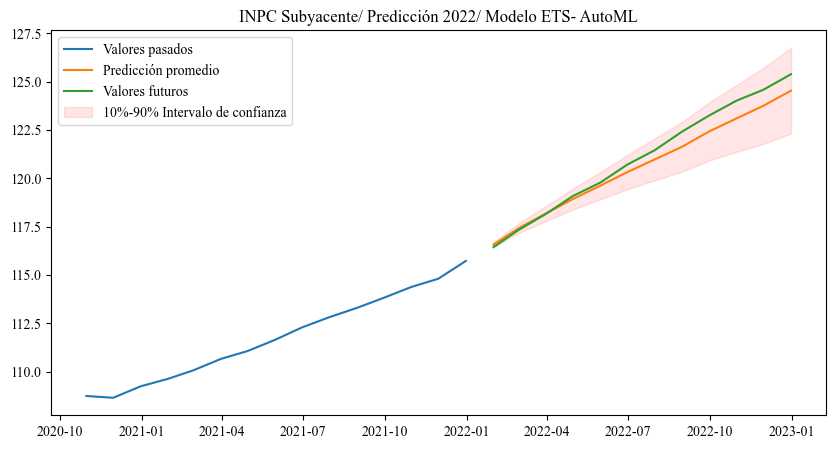

In [10]:
plt.figure(figsize=(10, 5))

item_id = "ipcsub"
y_past = train_data.loc[item_id]["ipcsub"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["ipcsub"][-15:+12]

plt.plot(y_past[-15:], label="Valores pasados")
plt.plot(y_pred["mean"], label="Predicción promedio")
plt.plot(y_test, label="Valores futuros")
plt.title('INPC Subyacente/ Predicción 2022/ Modelo ETS- AutoML')
plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% Intervalo de confianza"
)
plt.legend();
import os
carpeta = 'gráficos_AutoML'
if not os.path.exists(carpeta):
    os.makedirs(carpeta)
ruta_archivo = os.path.join(carpeta, 'ipc_sub_pred_2022_ETS.png')
plt.savefig(ruta_archivo, dpi=300, bbox_inches='tight')


In [ ]:
import os
carpeta = 'gráficos_AutoML'
if not os.path.exists(carpeta):
    os.makedirs(carpeta)
ruta_archivo = os.path.join(carpeta, 'ipc_sub_pred_2022_ETS.png')
plt.savefig(ruta_archivo, dpi=300, bbox_inches='tight')

In [11]:
#Ahora pronostiquemos la crisis de 2008
test_data_n = train_data.iloc[204:228 ,0:12]




In [ ]:
# Establecemos el conjunto de validación
test_data_n = TimeSeriesDataFrame.from_data_frame(
    test_data_n,
    id_column="item_id",
    timestamp_column="fecha"
)


In [16]:
test_data_n = test_data_n.fill_missing_values()

In [ ]:

ipcsub_leaderboard_2008_series=predictor.leaderboard(test_data_n, silent=True)

In [12]:
#Hacemos la predicción en base al mejor modelo en la predicción fuera de muestra
predictions1 = predictor.predict(test_data_n)
predictions1

Global seed set to 123


mean        0.1        0.2        0.3        0.4  \
item_id timestamp                                                           
ipcsub  2008-01-31  69.232368  68.133873  68.613098  68.871666  69.063599   
        2008-02-29  69.360306  68.139381  68.671478  68.958946  69.172478   
        2008-03-31  69.070717  67.931618  68.428459  68.696594  68.895660   
        2008-04-30  69.736290  68.477203  69.026405  69.322784  69.542801   
        2008-05-31  70.125618  68.942535  69.458725  69.737190  69.943871   
        2008-06-30  70.391792  69.137413  69.685013  69.980209  70.199226   
        2008-07-31  70.729752  69.433167  69.999229  70.304352  70.530731   
        2008-08-31  70.628967  69.363113  69.915977  70.213821  70.434746   
        2008-09-30  71.224709  69.908279  70.482956  70.792755  71.022614   
        2008-10-31  71.529922  70.114624  70.732552  71.065598  71.312691   
        2008-11-30  72.001572  70.440414  71.122192  71.489548  71.762024   
        2008-12-31  72.106430  70.519821  71.212570  71.585945  71.862915   

                          0.5        0.6        0.7        0.8        0.9  
item_id timestamp                                                          
ipcsub  2008-01-31  69.232368  69.401154  69.593079  69.851639  70.330872  
        2008-02-29  69.360306  69.548141  69.761665  70.049149  70.581238  
        2008-03-31  69.070717  69.245773  69.444839  69.712967  70.209808  
        2008-04-30  69.736290  69.929779  70.149796  70.446175  70.995377  
        2008-05-31  70.125618  70.307365  70.514053  70.792526  71.308701  
        2008-06-30  70.391792  70.584358  70.803375  71.098579  71.646172  
        2008-07-31  70.729752  70.928780  71.155159  71.460281  72.026344  
        2008-08-31  70.628967  70.823174  71.044098  71.341949  71.894806  
        2008-09-30  71.224709  71.426804  71.656662  71.966461  72.541138  
        2008-10-31  71.529922  71.747154  71.994247  72.327301  72.945221  
        2008-11-30  72.001572  72.241127  72.513611  72.880966  73.562729  
        2008-12-31  72.106430  72.349937  72.626923  73.000282  73.693039

In [13]:
test_data_n1 = train_data.iloc[204:240 ,0:12]

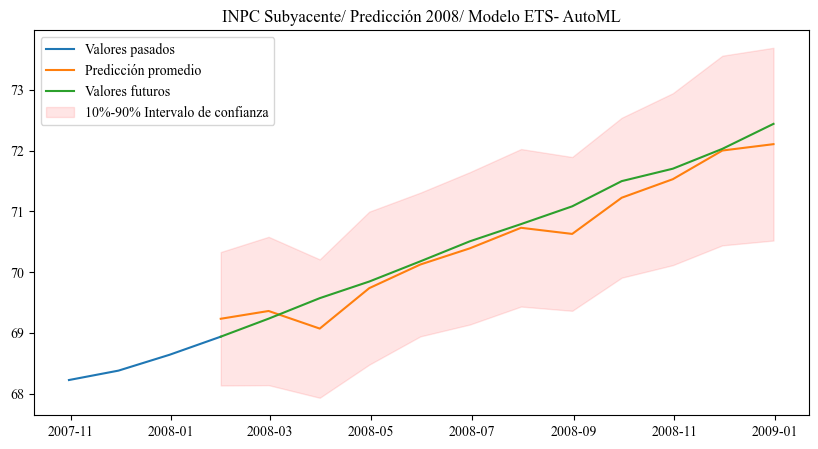

In [14]:
plt.figure(figsize=(10, 5))

item_id = "ipcsub"
y_past = train_data.loc[item_id]["ipcsub"][225:+229]
y_pred = predictions1.loc[item_id]
y_test = test_data_n1.loc[item_id]["ipcsub"][-12:]

plt.plot(y_past[-200:+252], label="Valores pasados")
plt.plot(y_pred["mean"], label="Predicción promedio")
plt.plot(y_test, label="Valores futuros")
plt.title('INPC Subyacente/ Predicción 2008/ Modelo ETS- AutoML')
plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% Intervalo de confianza"
)
plt.legend();

In [7]:
train_data1=train_data['ipcsub']
test_data1=test_data['ipcsub']


In [9]:
variaciones_porcentuales = (train_data1.diff() / train_data1.shift(1)) * 100


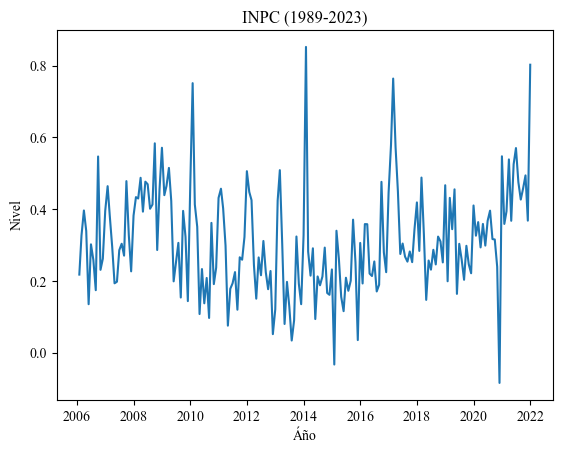

In [14]:

plt.figure()
plt.plot(variaciones_porcentuales.iloc[204:])
plt.ylabel('Nivel')
plt.xlabel('Áño')
plt.title('INPC (1989-2023)')
for i in plt.get_fignums():
    plt.figure(i)
    plt.savefig('figure%d.png' % i)
plt.show()



In [35]:
data=dataset.iloc[0:, 0:3]

In [36]:
data.set_index('fecha', inplace=True)

In [37]:
data=pd.DataFrame(data['ipcsub'])

In [38]:
inpc_sub = (data.diff() / data.shift(1)) * 100

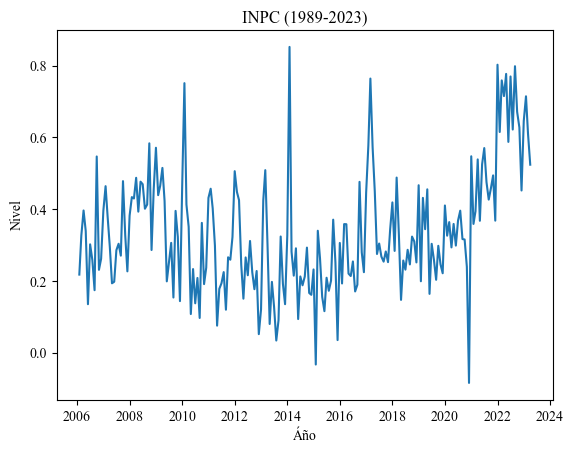

In [39]:
plt.figure()
plt.plot(inpc_sub.iloc[204:])
plt.ylabel('Nivel')
plt.xlabel('Áño')
plt.title('INPC (1989-2023)')
for i in plt.get_fignums():
    plt.figure(i)
    plt.savefig('figure%d.png' % i)
plt.show()

